In [15]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [16]:
# Import the data into a Pandas DataFrame
housing_df = pd.read_csv("Resources/Housing_history.csv")
housing_df.head()

,month_date_yyyymm,state,state_id,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag
0,202307,Rhode Island,RI,550000.0,0.0046,0.1573,1003.0,0.0437,-0.3268,36.0,...,1050556.0,0.0494,0.3553,2615.0,-0.0130,-0.2394,1.6181,-0.1581,0.2947,0.0
1,202307,Michigan,MI,297000.0,-0.0075,0.0425,16106.0,0.0980,-0.2071,36.0,...,424210.0,-0.0087,0.0609,25139.0,0.0677,-0.1976,0.5651,-0.0439,0.0276,0.0
2,202307,Nebraska,NE,359000.0,-0.0296,0.1397,3493.0,0.1009,0.1671,43.0,...,423940.0,-0.0207,0.1038,6562.0,0.0316,-0.0353,0.8932,-0.1087,-0.3978,0.0
3,202307,Idaho,ID,597750.0,-0.0021,0.0489,6847.0,0.0916,-0.1712,46.0,...,891178.0,0.0121,0.0682,10251.0,0.0593,-0.1624,0.5002,-0.0480,0.0173,0.0
4,202307,Arkansas,AR,299900.0,0.0098,0.0905,7509.0,0.0522,0.1505,53.0,...,399636.0,0.0039,0.0652,11899.0,0.0381,0.0431,0.5998,-0.0240,-0.1684,0.0


In [50]:
# Organize the data by dropping columns and renaming the columns
housing_df_organized = housing_df[["state","month_date_yyyymm","median_listing_price"]]
housing2_df = housing_df_organized.rename(columns={"month_date_yyyymm":"Year_Month",
                                                      "state":"State",
                                                      "median_listing_price":"Median Listing Price"})
# Drops any empty rows
housingclean_df = housing2_df.dropna(how='any')
housingclean_df

,State,Year_Month,Median Listing Price
0,Rhode Island,202307,550000.0
1,Michigan,202307,297000.0
2,Nebraska,202307,359000.0
3,Idaho,202307,597750.0
4,Arkansas,202307,299900.0
...,...,...,...
4330,District of Columbia,201607,579900.0
4331,Illinois,201607,224900.0
4332,Maryland,201607,299900.0
4333,Ohio,201607,139900.0


In [51]:
# Get all the data for December 2016 and 2021
housing2019 = housing2_df.loc[housing2_df['Year_Month'] == '201912']
housing2020 = housing2_df.loc[housing2_df['Year_Month'] == '202012']
housing2021 = housing2_df.loc[housing2_df['Year_Month'] == '202112']
new_housing = pd.merge(pd.merge(housing2019, housing2020, on='State'), housing2021, on='State')
new_housing = new_housing.rename(columns={"Year_Month":"Year_Month_2021",
                                          "Year_Month_x":"Year_Month_2019",
                                          "Year_Month_y":"Year_Month_2020",
                                          "Median Listing Price":"Median Listing Price_2021",
                                          "Median Listing Price_x":"Median Listing Price_2019",
                                          "Median Listing Price_y":"Median Listing Price_2020"})
new_housing

,State,Year_Month_2019,Median Listing Price_2019,Year_Month_2020,Median Listing Price_2020,Year_Month_2021,Median Listing Price_2021
0,Pennsylvania,201912,219400.0,202012,259900.0,202112,250000.0
1,Utah,201912,412000.0,202012,531450.0,202112,588225.0
2,New York,201912,462450.0,202012,569000.0,202112,549945.0
3,Colorado,201912,473014.0,202012,510500.0,202112,549500.0
4,West Virginia,201912,161000.0,202012,165000.0,202112,175000.0
5,Florida,201912,329995.0,202012,342250.0,202112,414950.0
6,Wyoming,201912,266500.0,202012,265000.0,202112,325000.0
7,Minnesota,201912,279900.0,202012,299650.0,202112,320000.0
8,Kansas,201912,179950.0,202012,195125.0,202112,212500.0
9,Virginia,201912,316225.0,202012,344995.0,202112,366975.0


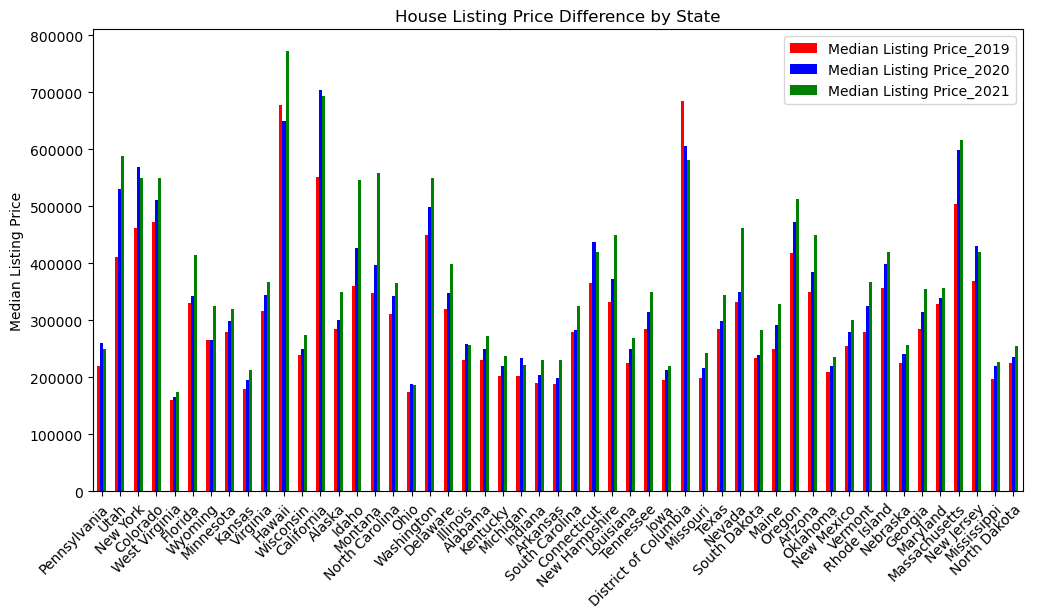

In [52]:
# Bar graph to show the difference in house listing price 
figure1 = new_housing.plot(kind="bar", color=["red", "blue","green"], figsize=(12,6),
                           title="House Listing Price Difference by State",
                           xlabel="State",
                           ylabel="Median Listing Price")

figure1.set_xticklabels(new_housing['State'], rotation=45, rotation_mode="anchor", ha="right", wrap=True)
plt.savefig("output_data/Fig1.png")
plt.show()

In [53]:

new_housing.to_csv("output_data/Median Listing Prices.csv")

In [54]:
selected_states = ["California", "Texas", "New York", "Florida", "Illinois"]
selected_housing = new_housing[new_housing["State"].isin(selected_states)]
selected_housing

,State,Year_Month_2019,Median Listing Price_2019,Year_Month_2020,Median Listing Price_2020,Year_Month_2021,Median Listing Price_2021
2,New York,201912,462450.0,202012,569000.0,202112,549945.0
5,Florida,201912,329995.0,202012,342250.0,202112,414950.0
12,California,201912,551728.0,202012,704450.0,202112,692928.0
20,Illinois,201912,231450.0,202012,259450.0,202112,257000.0
34,Texas,201912,285000.0,202012,299900.0,202112,345500.0


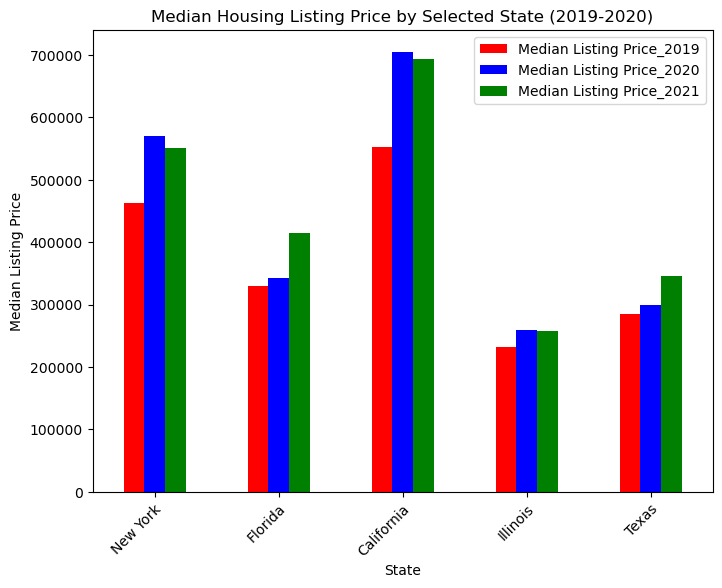

In [55]:
figure2 = selected_housing.plot(kind="bar", color=["red", "blue", "green"], figsize=(8,6),
                           title="Median Housing Listing Price by Selected State (2019-2020)",
                           xlabel="State",
                           ylabel="Median Listing Price")

figure2.set_xticklabels(selected_housing['State'], rotation=45, rotation_mode="anchor", ha="right", wrap=True)
plt.savefig("output_data/Fig2.png")
plt.show()

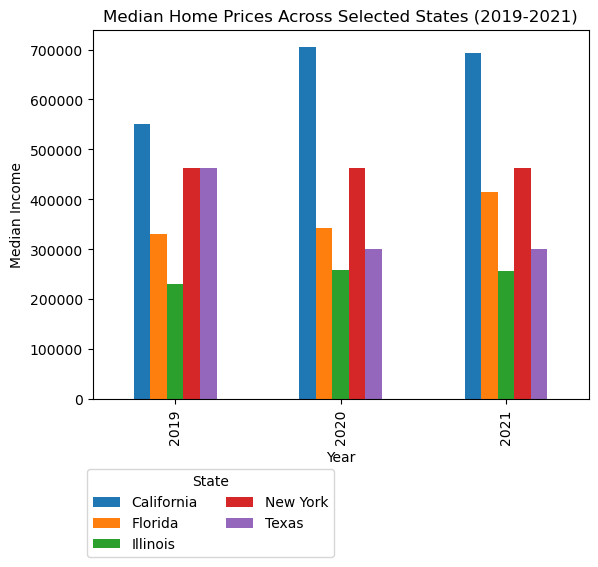

In [56]:
sample_data_home_price = {    'Year': [2019, 2020, 2021],
    'California': [551728, 704450, 692928],
    'Florida': [329995, 342250, 414950],
    'Illinois': [231450, 259450, 257000],
    'New York': [462450, 462450, 462450],
    'Texas': [462450, 299900, 299900]
}

df = pd.DataFrame(sample_data_home_price)

# Set 'Year' column as index 
df.set_index('Year', inplace=True)

# Plot the bar graph
df.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Median Income')
plt.title('Median Home Prices Across Selected States (2019-2021)')
plt.legend(title='State',bbox_to_anchor=(0.5, -0.17), loc='upper right', ncol=2)

# Save the chart as a .fig file
plt.savefig('output_data/bar_chart_123.png')

plt.show()

In [57]:
# List of states you are interested in
states_of_interest = ['California', 'Florida', 'Illinois','New York','Texas']
# Filter the data for the specified states
filtered_data_HP = selected_housing[selected_housing['State'].isin(states_of_interest)].copy()
# Calculate income difference between 2020 and 2019
filtered_data_HP['Home_Price_2019_2020'] = filtered_data_HP['Median Listing Price_2020'] - filtered_data_HP['Median Listing Price_2019']
# Calculate income difference between 2021 and 2020
filtered_data_HP['Home_Price_2020_2021'] = filtered_data_HP['Median Listing Price_2021'] - filtered_data_HP['Median Listing Price_2020']

# Calculate cumulative income increase over the three years
filtered_data_HP['Home_Price_Increase'] = (
    filtered_data_HP['Home_Price_2019_2020'] +
    filtered_data_HP['Home_Price_2020_2021']
)


# Calculate cumulative income increase in percentage
filtered_data_HP.loc[:, 'Cumulative_Income_Increase_Percentage'] = (
    (filtered_data_HP['Home_Price_Increase'] / filtered_data_HP['Median Listing Price_2019']) * 100
)

# Print the updated DataFrame
filtered_data_HP.head()

,State,Year_Month_2019,Median Listing Price_2019,Year_Month_2020,Median Listing Price_2020,Year_Month_2021,Median Listing Price_2021,Home_Price_2019_2020,Home_Price_2020_2021,Home_Price_Increase,Cumulative_Income_Increase_Percentage
2,New York,201912,462450.0,202012,569000.0,202112,549945.0,106550.0,-19055.0,87495.0,18.919883
5,Florida,201912,329995.0,202012,342250.0,202112,414950.0,12255.0,72700.0,84955.0,25.744329
12,California,201912,551728.0,202012,704450.0,202112,692928.0,152722.0,-11522.0,141200.0,25.592321
20,Illinois,201912,231450.0,202012,259450.0,202112,257000.0,28000.0,-2450.0,25550.0,11.039101
34,Texas,201912,285000.0,202012,299900.0,202112,345500.0,14900.0,45600.0,60500.0,21.228070
